**ANÁLISE SOBRE O COVID-19 NO BRASIL**
POR: ROMULO SIQUEIRA SANTOS |
REF: YOUTUBE CANAL SANDECO  |
Data Repository by Johns Hopkins CSSE

In [0]:
#Bibliotecas necesárias para análise
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from datetime import datetime
from pandas import Series

In [0]:
#Base de dados da Universidade de Johns Hopkings
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [258]:
#Conhecendo o formato dos dados gerais de Covid-19 nível Mundial.
casos.shape

(477, 63)

In [259]:
casos.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385


In [260]:
mortes.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29,29,33
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [261]:
recuperados.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,5,5,5,5,5,5,5,5,5,5,5,10,10,10,10,10,12,12,12,14,15,15,15,15,17,17,21,21,22,22,22,28,28,28,31,31,31,31,31,31,31,31,33,34,34,35,35,35,35,41,42,42,42
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4,9,9,9,9,12,12,12,13,18,18,22,22,22,22,22,22,22,22,32,32,32,43,43,43,46,76,76,76,101,118,118,118,118,118,144,144,144,150,191
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,72,78,78,78,78,78,78,78,78,78,96,96,97,105,105,109,114,114,114,124


In [0]:
#Iremos focar nossa análise nos registros de Covid-19 a nível Brasil.
casos_brasil = casos.loc[casos['Country/Region'] == 'Brazil']

In [263]:
casos_brasil.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793


In [0]:
#Iremos focar nossa análise nos registros de Covid-19 a nível Brasil.
mortes_brasil = mortes.loc[mortes['Country/Region'] == 'Brazil']
recuperados_brasil = recuperados.loc[recuperados['Country/Region'] == 'Brazil']

In [265]:
mortes_brasil.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,11


In [266]:
recuperados_brasil.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2


In [0]:
# Selecionar somente as colunas datas de registros do Covid-19, a partir da quarta coluna selecionar todos os dados, shape = 1 para selecionar colunas. 
casos_brasil = np.sum(casos_brasil.iloc[ : , 4 : casos_brasil.shape[1]])

In [268]:
casos_brasil.tail()

3/16/20    200
3/17/20    321
3/18/20    372
3/19/20    621
3/20/20    793
dtype: int64

In [0]:
mortes_brasil = np.sum(mortes_brasil.iloc[ : , 4 : mortes_brasil.shape[1]])

In [270]:
mortes_brasil.tail()

3/16/20     0
3/17/20     1
3/18/20     3
3/19/20     6
3/20/20    11
dtype: int64

In [0]:
recuperados_brasil = np.sum(recuperados_brasil.iloc[ : , 4 : recuperados_brasil.shape[1]])

In [272]:
recuperados_brasil.tail()

3/16/20    1
3/17/20    2
3/18/20    2
3/19/20    2
3/20/20    2
dtype: int64

In [0]:
#Transformar o íncide em formato DataTime
casos_brasil.index = pd.DatetimeIndex(casos_brasil.index)
mortes_brasil.index = pd.DatetimeIndex(mortes_brasil.index)
recuperados_brasil.index = pd.DatetimeIndex(recuperados_brasil.index)

In [274]:
casos_brasil.tail()

2020-03-16    200
2020-03-17    321
2020-03-18    372
2020-03-19    621
2020-03-20    793
dtype: int64

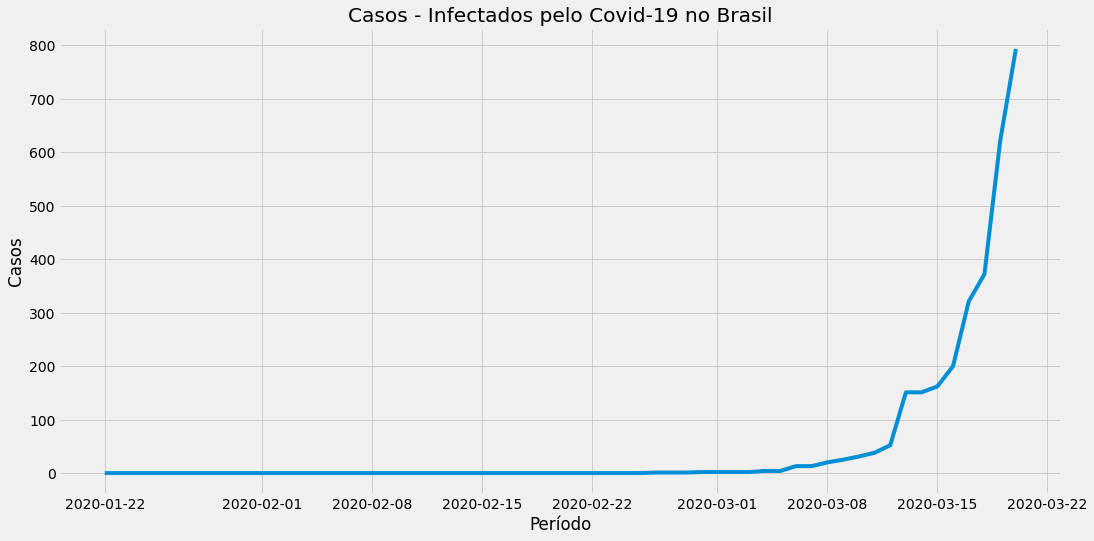

In [277]:
plt.figure(figsize = (16,8))
plt.title("Casos - Infectados pelo Covid-19 no Brasil")
plt.xlabel("Período")
plt.ylabel("Casos")
#plt.legend(loc = 'best')
plt.plot(casos_brasil)

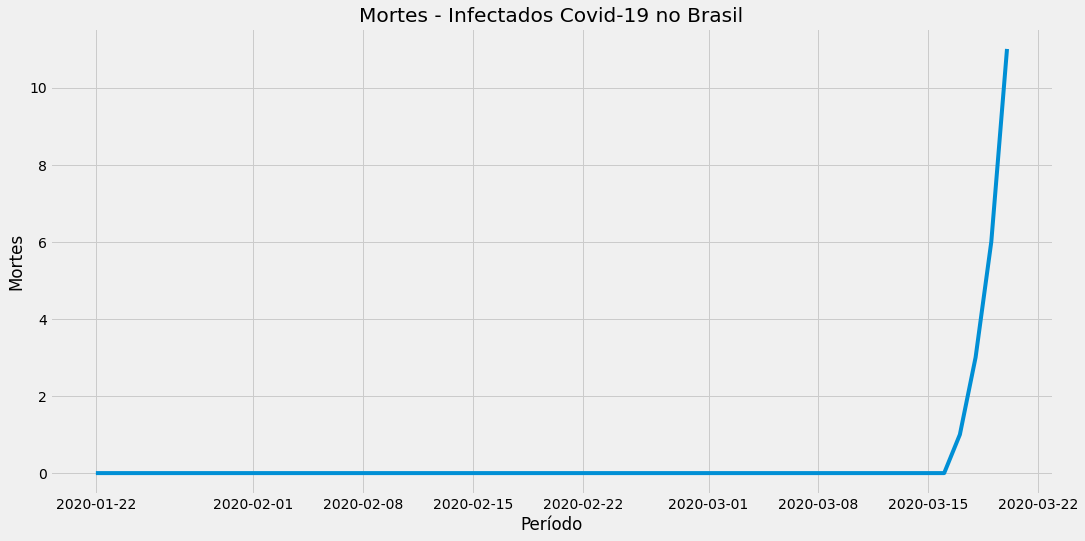

In [279]:
plt.figure(figsize = (16,8))
plt.title("Mortes - Infectados Covid-19 no Brasil")
plt.xlabel("Período")
plt.ylabel("Mortes")
#plt.legend(loc = 'best')
plt.plot(mortes_brasil)

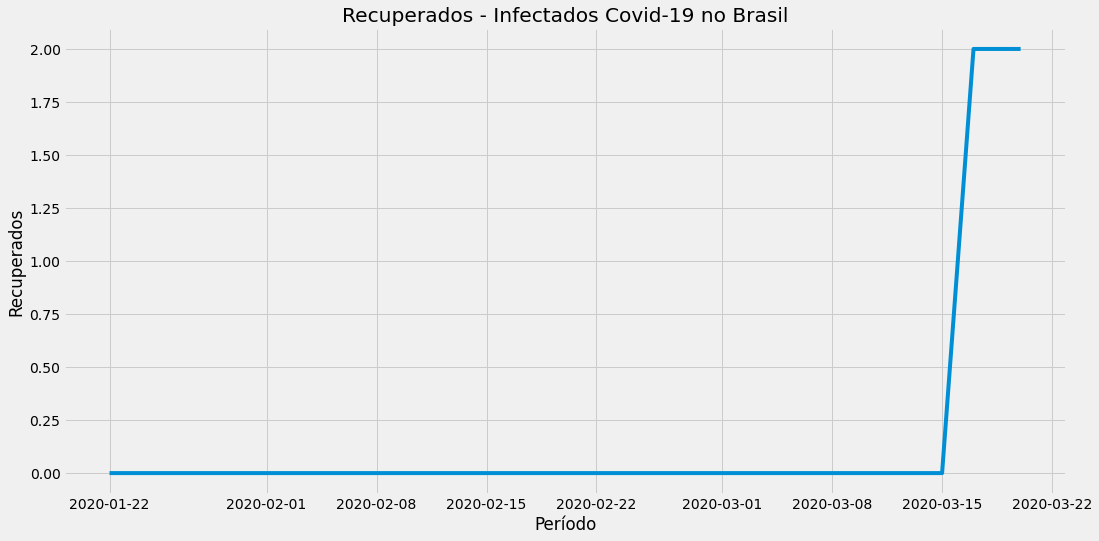

In [281]:
plt.figure(figsize = (16,8))
plt.title("Recuperados - Infectados Covid-19 no Brasil")
plt.xlabel("Período")
plt.ylabel("Recuperados")
#plt.legend(loc = 'best')
plt.plot(recuperados_brasil)

In [0]:
#Calculo da Mortalidade no Brasil
mortalidade = (mortes_brasil/casos_brasil)*100

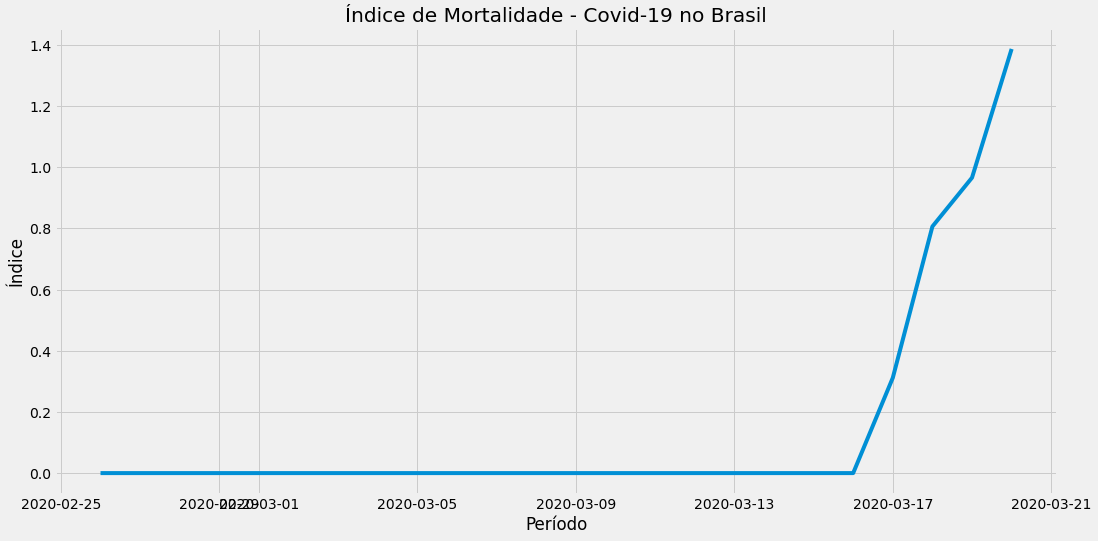

In [284]:
plt.figure(figsize = (16,8))
plt.title("Índice de Mortalidade - Covid-19 no Brasil")
plt.xlabel("Período")
plt.ylabel("Índice")
#plt.legend(loc = 'best')
plt.plot(mortalidade)

In [0]:
#Pessoas com Vírus Ativos
ativos = casos_brasil - (recuperados_brasil+mortes_brasil )

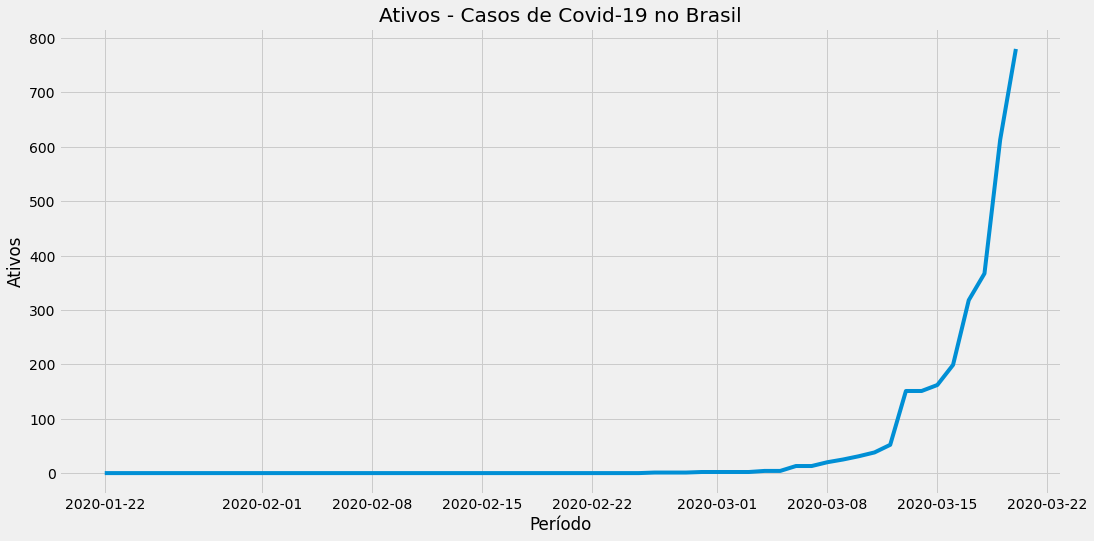

In [287]:
plt.figure(figsize = (16,8))
plt.title("Ativos - Casos de Covid-19 no Brasil")
plt.xlabel("Período")
plt.ylabel("Ativos")
#plt.legend(loc = 'best')
plt.plot(ativos)

In [288]:
ativos.tail()

2020-03-16    199
2020-03-17    318
2020-03-18    367
2020-03-19    613
2020-03-20    780
dtype: int64

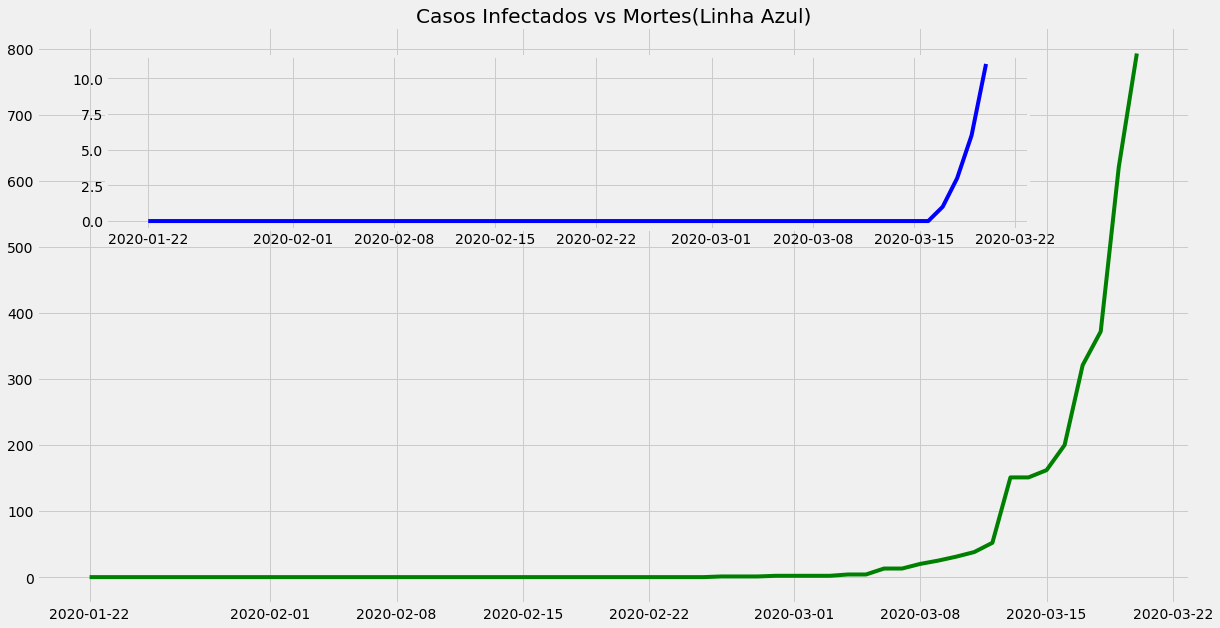

In [289]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([0.06, 0.65, 0.8, 0.3])

ax1.set_title('Casos Infectados vs Mortes(Linha Azul)')

ax1.plot(casos_brasil,
         color='green')

ax2.plot(mortes_brasil, 
         color='blue')
plt.show()

In [0]:
df = pd.concat([casos_brasil, mortes_brasil, recuperados_brasil, ativos], axis=1)
df.columns = (['casos', 'mortes', 'recuperados', 'ativos'])

In [291]:
df.tail()

,casos,mortes,recuperados,ativos
2020-03-16,200,0,1,199
2020-03-17,321,1,2,318
2020-03-18,372,3,2,367
2020-03-19,621,6,2,613
2020-03-20,793,11,2,780


In [0]:
#plt.rcParams['figure.figsize'] = (16,8)
#df.plot()

Vamos prever a quantidade de mortes para 30 dias pelo COVID-19 utilizando um Framework para Análise de Séries Temporais, o Facebook Prophet.


In [0]:
from fbprophet import Prophet

In [0]:
#Criando colunas DS e Y, são obrigatórias


In [0]:
dados = pd.DataFrame(casos_brasil.copy())

In [0]:
dados.index = pd.DatetimeIndex(dados.index)

In [0]:
dados['ds'] = dados.index

In [0]:
dados['ds'] = dados.index

In [0]:
dados.columns = ['y2', 'ds']

In [0]:
dados['y'] = dados['y2']

In [0]:
dados.drop('y2', axis = 1, inplace=True)

In [0]:
dados.index = range(len(dados))

In [306]:
dados

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
5,2020-01-27,0
6,2020-01-28,0
7,2020-01-29,0
8,2020-01-30,0
9,2020-01-31,0


In [307]:
dados.drop(dados.index[0:34],inplace=True)
dados

,ds,y
34,2020-02-25,0
35,2020-02-26,1
36,2020-02-27,1
37,2020-02-28,1
38,2020-02-29,2
39,2020-03-01,2
40,2020-03-02,2
41,2020-03-03,2
42,2020-03-04,4
43,2020-03-05,4


In [308]:
dados['ds'] = pd.to_datetime(dados['ds'])
dados.tail()

,ds,y
54,2020-03-16,200
55,2020-03-17,321
56,2020-03-18,372
57,2020-03-19,621
58,2020-03-20,793


Previsão de 30 dias com intervalo de 95% de confiança, assumimos 5% de erros.  

In [0]:
dias = 7

In [310]:
m = Prophet(interval_width=0.95)
m.fit(dados)
futuro = m.make_future_dataframe(periods=dias)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [311]:
futuro.tail(dias)

,ds
25,2020-03-21
26,2020-03-22
27,2020-03-23
28,2020-03-24
29,2020-03-25
30,2020-03-26
31,2020-03-27


In [312]:
previsao = m.predict(futuro)
previsao.tail(dias)

#yhat_lower é a previsão para baixo e yhat_upper a previsão para cima. 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
25,2020-03-21,383.559524,118.355741,568.934963,383.559508,383.559538,-37.221155,-37.221155,-37.221155,-37.221155,-37.221155,-37.221155,0.0,0.0,0.0,346.338369
26,2020-03-22,404.346899,114.533660,600.429926,404.346854,404.346936,-52.017997,-52.017997,-52.017997,-52.017997,-52.017997,-52.017997,0.0,0.0,0.0,352.328901
27,2020-03-23,425.134273,156.240664,594.660641,425.134188,425.134346,-58.484026,-58.484026,-58.484026,-58.484026,-58.484026,-58.484026,0.0,0.0,0.0,366.650246
28,2020-03-24,445.921647,208.777739,683.458024,445.921519,445.921758,6.319046,6.319046,6.319046,6.319046,6.319046,6.319046,0.0,0.0,0.0,452.240693
29,2020-03-25,466.709022,235.121927,712.874382,466.708841,466.709179,0.770084,0.770084,0.770084,0.770084,0.770084,0.770084,0.0,0.0,0.0,467.479106
30,2020-03-26,487.496396,292.617771,778.772008,487.496163,487.496597,45.718610,45.718610,45.718610,45.718610,45.718610,45.718610,0.0,0.0,0.0,533.215006
31,2020-03-27,508.283770,368.208694,839.613099,508.283484,508.284016,94.915438,94.915438,94.915438,94.915438,94.915438,94.915438,0.0,0.0,0.0,603.199208


In [313]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
25,2020-03-21,118.355741,346.338369,568.934963
26,2020-03-22,114.533660,352.328901,600.429926
27,2020-03-23,156.240664,366.650246,594.660641
28,2020-03-24,208.777739,452.240693,683.458024
29,2020-03-25,235.121927,467.479106,712.874382
30,2020-03-26,292.617771,533.215006,778.772008
31,2020-03-27,368.208694,603.199208,839.613099


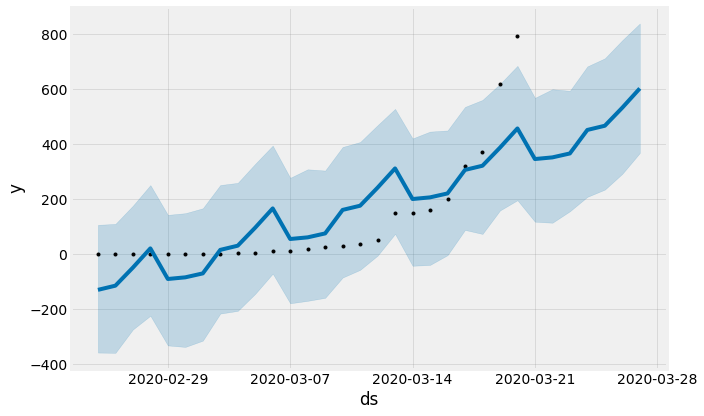

In [314]:
confirmed_forecast_plot = m.plot(previsao)
